## Callie Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob

In [2]:
with open("../data/CallieModels/original_format/t1400g1000f1_m0.0_co1.0.spec") as f:
    data = f.readlines()

In [3]:
model = np.array([[data[i].split("\t")[0], data[i].split("\t")[1]] for i in range(2, len(data))], dtype=float)

#### Cut segment between 2.25-2.40

In [5]:
model.sort(axis=0)
model

array([[1.42857231e+00, 4.00906462e+09],
       [1.42857286e+00, 4.01454716e+09],
       [1.42857341e+00, 4.02298605e+09],
       ...,
       [3.70369630e+00, 1.19548435e+11],
       [3.70370000e+00, 1.19553431e+11],
       [3.70370370e+00, 1.19554732e+11]])

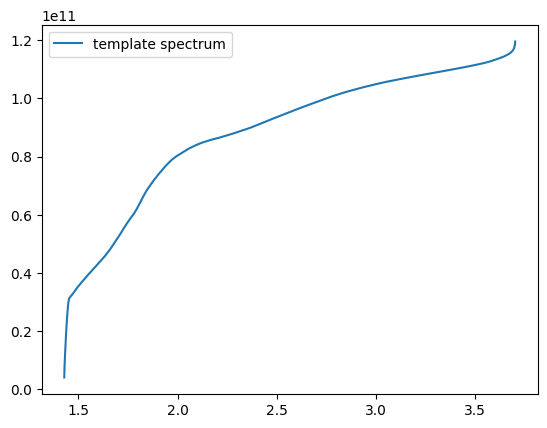

In [9]:
plt.plot(model[:,0], model[:,1], label="template spectrum")
plt.legend()

array([[2.28000063e+00, 2.28000203e+00, 2.28000344e+00, ...,
        2.38999664e+00, 2.38999818e+00, 2.38999972e+00],
       [8.78856156e+10, 8.78856289e+10, 8.78856359e+10, ...,
        9.04771957e+10, 9.04772218e+10, 9.04772584e+10]])

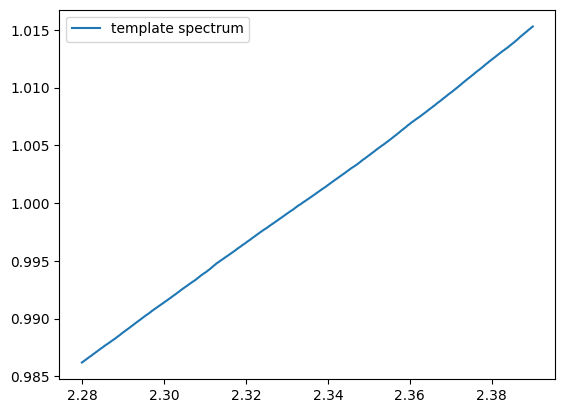

In [10]:
tind = (model[:,0] > 2.28) * (model[:,0] < 2.39)
lam = model[tind,0]
template = model[tind,1]
template = template/np.median(template)
plt.plot(lam, template, label="template spectrum")
plt.legend()
new_model = np.array([model[tind,0], model[tind,1]])
new_model

#### Store in new fits

In [39]:
c1 = fits.Column(name='wavelength (um)', array=new_model[0], format="E")
c2 = fits.Column(name='flux ((W/m2/m)', array=new_model[1], format="E")
t = fits.BinTableHDU.from_columns([c1, c2])
savename = "../data/CallieModels/t1400g1000f1_m0.0_co1.0.fits"
t.writeto(savename)

### Cut all 

In [46]:
for file in glob.glob(f"../data/CallieModels/original_format/t*.spec"):
    filename=file.split("/")[-1][:-5]
    print(filename)
    with open(file) as f:
        data = f.readlines()
    model = np.array([[data[i].split("\t")[0], data[i].split("\t")[1]] for i in range(2, len(data))], dtype=float)
    model.sort(axis=0)

    tind = (model[:,0] > 2.25) * (model[:,0] < 2.40)
    new_model = np.array([model[tind,0], model[tind,1]])
    c1 = fits.Column(name='wavelength (um)', array=new_model[0], format="E")
    c2 = fits.Column(name='flux ((W/m2/m)', array=new_model[1], format="E")
    t = fits.BinTableHDU.from_columns([c1, c2])
    savename = f"../data/CallieModels/{filename}.fits"
    t.writeto(savename)

t1500g1000f1_m0.0_co1.0
t1400g1000f8_m0.0_co1.0
t1500g1000f8_m0.0_co1.0
t1400g1000f1_m0.0_co1.0
t1400g1000f4_m0.0_co1.0
t1400g1000f3_m0.0_co1.0
t1500g1000f2_m0.0_co1.0
t1400g1000nc_m0.0_co1.0
t1500g1000nc_m0.0_co1.0
t1400g1000f2_m0.0_co1.0
t1500g1000f3_m0.0_co1.0
t1500g1000f4_m0.0_co1.0
